# Project 7: Statistical Analysis and Hypothesis Testing

## Packages and setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

### Reading data and initial processing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Read data using pandas
user_df = pd.read_csv(r'/content/drive/MyDrive/VIP/Cookie-Cats/cookie_cats.csv')

#Check data types of each column using "dtypes" function
print("Data types for the data set:")
user_df.dtypes

#Check dimension of data i.e. # of rows and #column using pandas "shape" funtion
print("Shape of the data i.e. no. of rows and columns")
user_df.shape

#display first 5 rows of the data using "head" function
print("First 5 rows of the raw data:")
user_df.head(5)

Data types for the data set:


userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

Shape of the data i.e. no. of rows and columns


(90189, 5)

First 5 rows of the raw data:


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


## Exercise

## Q1. Detect and resolve problems in the data (Missing value, Outliers, etc.)

### Q1.1 Identify missing value

In [4]:
#Check for any missing values in the data using isnull() function

user_df.isnull()


,userid,version,sum_gamerounds,retention_1,retention_7
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
90184,False,False,False,False,False
90185,False,False,False,False,False
90186,False,False,False,False,False
90187,False,False,False,False,False


In [5]:
user_df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

It returns '**False**' for all the rows, and it might be difficult to evaluate 90189 rows × 5 columns with naked eye!

So, above statement returns sum/count of null values and here, it is '0' i.e, no NULL **VALUES**

### Q1.2 Identify outliers

Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

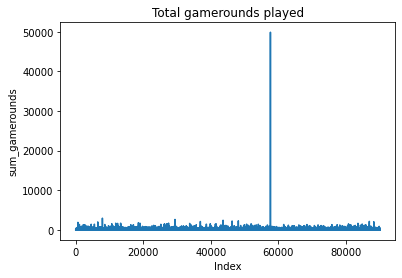

In [6]:
#Check for outlier values in sum_gamerounds column
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds)

It is clearly evident that this has Outliers. and it is the highest value in the 'sum_gamerounds' column

In [7]:
#Based on the plot, filter out the outlier from sum_gamerounds played; Use max() fucntion to find the index of the outlier

user_df.sum_gamerounds.max()

49854

In [8]:
#Let's use this maximum value/Outlier and find the exact record in our dataset and drop it

outlierPoint = user_df.index[user_df["sum_gamerounds"] == 49854]
# Here I've hardcoded the value,but using the statement from above cell is prefered, if the data changes in this problem.
print(outlierPoint)

#dropping the outlier

user_df= user_df.drop(index=outlierPoint)
user_df


Int64Index([57702], dtype='int64')


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

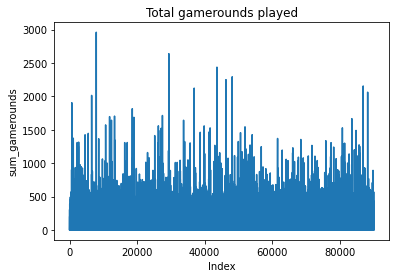

In [9]:
#Plot the graph for sum_gamerounds player after removing the outlier
#Let's take a look at new data plot after removing the outlier value

plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds)

## Q2. Plot summary statistics and identify trends to answer basis business questions

### Q2.1 What is the overall 7-day retention rate of the game?

In [10]:
#Insert calculation for 7-day retention rate

retentionRate_7Days = ( user_df['retention_7'].mean() )*100
print("overall 7-day retention rate of the game is: " ,retentionRate_7Days)


overall 7-day retention rate of the game is:  18.60557945624695


### Q2.2 How many players never played the game after installing? 

In [11]:
# Find number of customers with sum_gamerounds is equal to zero
user_df[user_df.sum_gamerounds == 0].index.shape[0]

3994

### Q2.3 Does the number of users decrease as the level progresses highlighting the difficulty of the game?

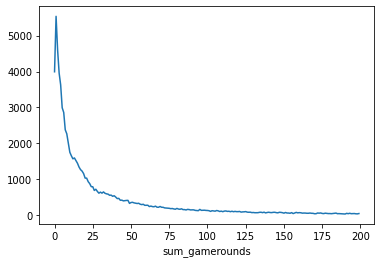

In [12]:
#Group by sum_gamerounds and count the number of users for the first 200 gamerounds
#Use plot() function on the summarized stats to visualize the chart

DecreasingUsers = user_df.groupby("sum_gamerounds").userid.count()[0:200]
DecreasingUsers.plot()

## Q3. Generate crosstab for two groups of players to understand if there is a difference in 7 days retention rate & total number of game rounds played

### Q3.1 Seven days retention rate summary for different game versions

In [13]:
#Create cross tab for game version and retention_7 flag counting number of users for each possible categories

pd.crosstab(user_df.version, user_df.retention_7).apply(lambda r: r/r.sum(), axis=1)

retention_7,False,True
version,,
gate_30,0.809817,0.190183
gate_40,0.818000,0.182000


<mark>__Analsysis Results:__

Here, with the  cross tab it is clear regarding the number of users for game_Version and retention_7 flag is higher ( and also 'True' ) for gate_30 version i.e, it has higher retention rate and should be considered as prefered gate for retention. Although, in both of them around 80% of players have left the game after 7 days retention time.

### Q3.2 Gamerounds summary for different game versions

In [14]:
#use pandas group by to calculate average game rounds played summarized by different versions

gameRounds=user_df.groupby("version").sum_gamerounds
gameRounds.agg("mean")

version
gate_30    51.342111
gate_40    51.298776
Name: sum_gamerounds, dtype: float64

In [15]:
gameRounds.agg(["count"])

,count
version,
gate_30,44699
gate_40,45489


<mark>__Analsysis Results:__

Yes, if we consider the count - gate 40 has more number, but the mean shows both are almost similar. 

SO, they are same as there isn't much difference between them.

## Q4. Perform two-sample test for groups A and B to test statistical significance amongst the groups in the sum of game rounds played i.e., if groups A and B are statistically different

### Initial data processing

In [16]:
#Define A/B groups for hypothesis testing
user_df["version"] = np.where(user_df.version == "gate_30", "A", "B")
group_A=pd.DataFrame(user_df[user_df.version=="A"]['sum_gamerounds'])
group_B=pd.DataFrame(user_df[user_df.version=="B"]['sum_gamerounds'])

### Q4.1 Shapiro test of Normality

In [17]:
#---------------------- Shapiro Test ----------------------
# NULL Hypothesis H0: Distribution is normal
# ALTERNATE Hypothesis H1: Distribution is not normal    

#test for group_A
shapiro(group_A)


#test for group_B
shapiro(group_B)

(0.48864424228668213, 0.0)

(0.48256540298461914, 0.0)

<mark>__Analsysis Results:__
  

As the P-Value for group_A and group_B are less than 0.05, the Shapiro test rejects the hypothesis of normality for both groups.

### Q4.2 Test of homegienity of variance

In [18]:
#---------------------- Leven's Test ----------------------
# NULL Hypothesis H0: Two groups have equal variances
# ALTERNATE Hypothesis H1: Two groups do not have equal variances

#perform levene's test and accept or reject the null hypothesis based on the results

stats.levene(group_A.sum_gamerounds, group_B.sum_gamerounds)

LeveneResult(statistic=0.07510153837481241, pvalue=0.7840494387892463)

<mark>__Analsysis Results:__

On observing p-Value it is clear that it is not less than 0.05, we fail to reject the Null Hypothesis H0 i.e, Two groups have equal variance.

### Q4.3 Test of significance: Two sample test

In [22]:
#---------------------- Two samples test ----------------------
# NULL Hypothesis H0: Two samples are equal
# ALTERNATE Hypothesis H1: Two samples are different

#Apply relevant two sample test to accept or reject the NULL hypothesis

stats.mannwhitneyu(group_A.sum_gamerounds, group_B.sum_gamerounds,alternative='greater')

#I've used Mann-Whitney U Test to identify whether the two samples are equal or not.

MannwhitneyuResult(statistic=1024285761.5, pvalue=0.02544577639572688)

<mark>__Analsysis Results:__

The result obtained from **Mann-Whitney U Test** clearly states that the statistic value is too high which represents distribution underlying distribution is different i.e, they are statistically different. i,e, **Alternate Hypothesis is true**.

## Q5. Based on significance testing results, if groups A and B are statistically different, which level has more advantage in terms of player retention and number of game rounds played

In [28]:
#Analyze the 1 day and 7 days retention rate for two different groups using group by function

# we'll take similar to previous calculation used to signify the tesitng results
testGroups = user_df[["version","retention_1","retention_7"]].groupby("version")
testGroupAggregation = testGroups.agg("mean")
testGroupAggregation


,retention_1,retention_7
version,,
A,0.448198,0.190183
B,0.442283,0.182000


<mark>__Analsysis Results:__
  
Based on the above performed significance tests and calculations, it is clear that level - Version-A i.e, Gate 30 has higher retention rate.